# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-11-18 16:00:09.126079


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 11/17/20


,11/17/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,11357322,248672,2.19
Brazil,5911758,166699,2.82
India,8912907,130993,1.47
Mexico,1011153,99026,9.79
United Kingdom,1414359,52839,3.74
Italy,1238072,46464,3.75
France,2087183,46346,2.22


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 11/17/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
52672,US,11036935,2020-11-15,246207.0,616.0,133045.0,148585.285714
52671,US,10903890,2020-11-14,245591.0,1266.0,166555.0,145253.428571
52670,US,10737335,2020-11-13,244325.0,1138.0,177224.0,139758.000000
52669,US,10560111,2020-11-12,243187.0,1218.0,160786.0,132291.000000
52668,US,10399325,2020-11-11,241969.0,1388.0,143236.0,127310.142857
52667,US,10256089,2020-11-10,240581.0,1398.0,138619.0,121493.714286
52666,US,10117470,2020-11-09,239183.0,696.0,120632.0,119381.142857


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 11/17/20


,11/17/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,568778,34156.0,6.01
Texas,1078875,20147.0,1.87
California,1052285,18347.0,1.74
Florida,897323,17644.0,1.97
New Jersey,285519,16618.0,5.82
Illinois,597849,11317.0,1.89
Massachusetts,192964,10360.0,5.37


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 11/17/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1803,California,1032095,2020-11-15,18262.0,9.0,9028.0,8483.142857
1802,California,1023067,2020-11-14,18253.0,48.0,9501.0,7672.142857
1801,California,1013566,2020-11-13,18205.0,70.0,9450.0,7193.571429
1800,California,1004116,2020-11-12,18135.0,27.0,8541.0,6751.714286
1799,California,995575,2020-11-11,18108.0,42.0,6143.0,6379.285714
1798,California,989432,2020-11-10,18066.0,45.0,8135.0,6290.142857
1797,California,981297,2020-11-09,18021.0,48.0,8584.0,5840.857143


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 11/17/20


,11/17/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,344523,7299.0,2.12
Orange,65957,1526.0,2.31
Riverside,76724,1374.0,1.79
San Bernardino,76685,1098.0,1.43
San Diego,66319,933.0,1.41
Sacramento,30999,527.0,1.70
San Joaquin,23734,501.0,2.11


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 11/17/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
5716,Los Angeles,339560,2020-11-15,7269.0,3.0,3011.0,2797.571429
5715,Los Angeles,336549,2020-11-14,7266.0,20.0,3684.0,2367.428571
5714,Los Angeles,332865,2020-11-13,7246.0,25.0,2415.0,2172.714286
5713,Los Angeles,330450,2020-11-12,7221.0,5.0,2486.0,2126.571429
5712,Los Angeles,327964,2020-11-11,7216.0,16.0,2088.0,2062.571429
5711,Los Angeles,325876,2020-11-10,7200.0,23.0,2251.0,2018.714286
5710,Los Angeles,323625,2020-11-09,7177.0,7.0,3648.0,1861.428571
5709,Los Angeles,319977,2020-11-08,7170.0,0.0,0.0,1541.000000
5708,Los Angeles,319977,2020-11-07,7170.0,13.0,2321.0,1765.571429
5707,Los Angeles,317656,2020-11-06,7157.0,17.0,2092.0,1618.428571



7 day new US cases as of 11/17/20


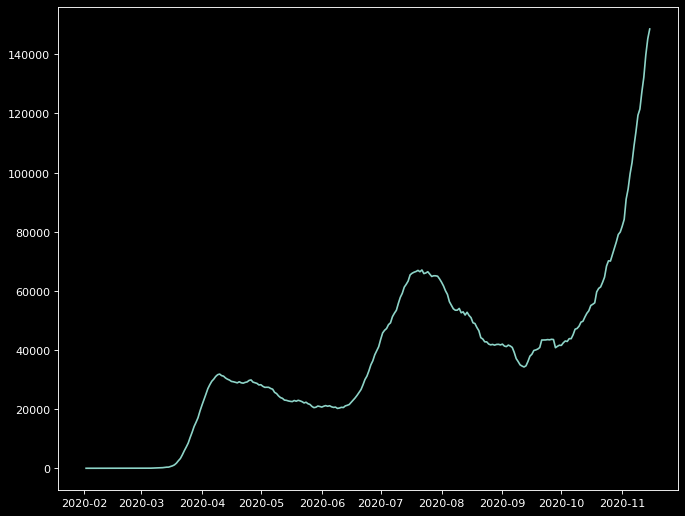

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 11/17/20


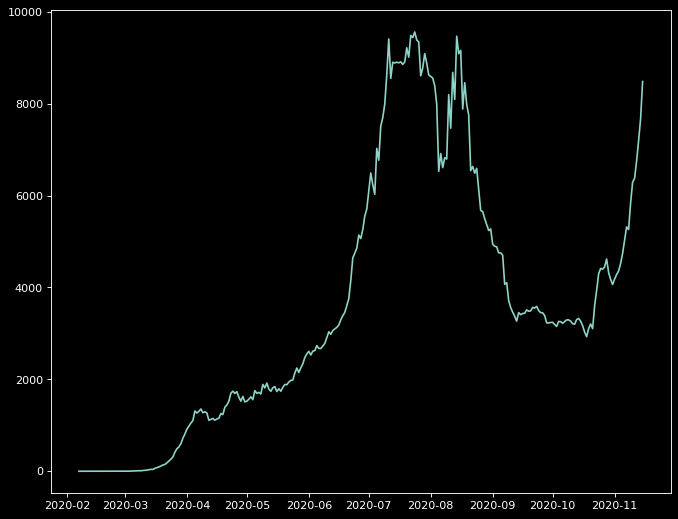

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 11/17/20


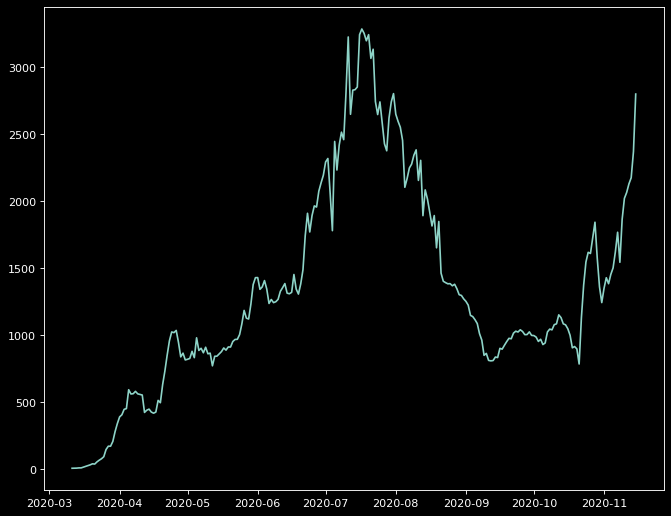

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()